<h1 align = "center"><font>BEST MOVIE ANALYZER. ROAD TO THE MODEL</font></h1>

In [361]:
#All libs we are required:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<h2 align = "center"><font>FIRST LOOK AT DATA</font></h2>
<h3 align = "center"><font color='#4e78f5'>Our dataset in general:</font></h3>

In [362]:
#First look at head of dataset:
movie_df_all = pd.read_csv('movieset_6800.csv')
movie_df_all.shape

(7668, 15)

In [363]:
movie_df_all.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [364]:
df_score_country = movie_df_all[["score", "country"]] 
df_score_USA =  df_score_country["China" == df_score_country["country"]]
df_score_USA['score'].mean()


6.702499999999999

<h3 align = "center"><font color='#4e78f5'>General situation:</font></h3>

<p>We have 7668 movies and different inforamtion about this movies.</p>
<p>Name - name of the movie.</p>
<p>Rating - who can watch this movie.</p>
<p>Genre - groups of feature films, distinguished on the basis of similar features of their internal structure.</p>
<p>Year - released year.</p>
<p>Released - released date with additional information.</p>
<p>Score - IMDB score.</p>
<p>Votes - number of votes.</p>
<p>Director - director who was produced film.</p>
<p>Writer - person who wrote history.</p>
<p>Star - the main actor of the movie.</p>
<p>Budget - quntity of money spent to the film.</p>
<p>Gross - quantity of money movie earned.</p>
<p>Company - company that produced the movie.</p>
<p>Runtime - duration of the movie</p>

<h3 align = "center"><font color='#4e78f5'>Is there correlation between score and other quantitative data?:</font></h3>

<AxesSubplot:xlabel='score', ylabel='year'>

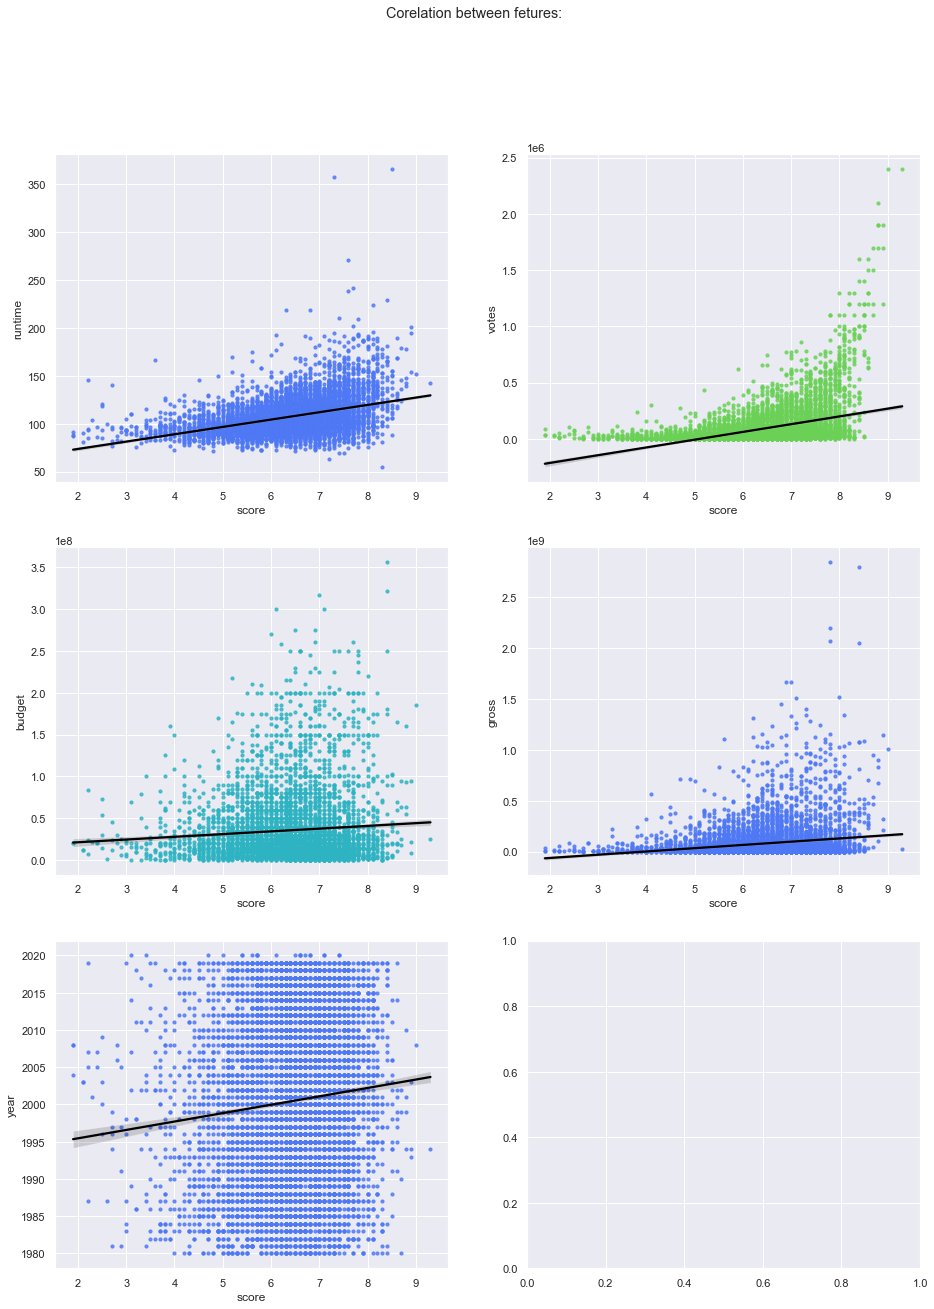

In [365]:
fig, axes = plt.subplots(3, 2)
fig.suptitle("Corelation between fetures:")
fig.set_size_inches(15.5, 20.5)

markersize = 3
data = movie_df_all

sns.regplot(ax = axes[0][0], x = "score", y = "runtime", data = data, line_kws={"color": "black"}, scatter_kws={'s':10}, color="#4e78f5")
sns.regplot(ax = axes[0][1], x = "score", y = "votes", data = data, line_kws={"color": "black"}, scatter_kws={'s':10}, color="#6ad156")
sns.regplot(ax = axes[1][0], x = "score", y = "budget", data = data, line_kws={"color": "black"}, scatter_kws={'s':10}, color="#2db3c2")
sns.regplot(ax = axes[1][1], x = "score", y = "gross", data = data, line_kws={"color": "black"}, scatter_kws={'s':10}, color="#4e78f5")
sns.regplot(ax = axes[2][0], x = "score", y = "year", data = data, line_kws={"color": "black"}, scatter_kws={'s':10}, color="#4e78f5")

In [366]:
#Create cor-matrix between everything (not compulsory to teach model):
movie_df_all.corr(method = "pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


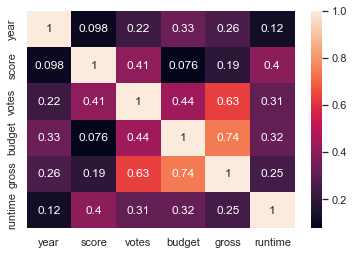

In [367]:
#Correlation between everything (quantitative)
#We can watch Corelleation between score in case if we will look at second column:
 
cor_matrix = movie_df_all.corr(method = "pearson")  
sns.heatmap(cor_matrix, annot = True)

plt.show()

Sorting corellation between feature and score:

Votes: 0.41 - Score of movie depends on votes most among all of them<br>
Runtime: 0.40 <br>
Gross: 0.19 <br>
Year: 0.098 <br>
budget: 0.076 <br>

<h2 align = "center"><font>CLEANING FEATURES</font></h2>

In [368]:
#Drop all Nan scores because if we do not know about score of this movie, there is no reason use it to teach our model.
movie_df_all = movie_df_all.dropna(axis='index', how='any', subset=['score'])
movie_df_all
#There is just 3 movies with Nan score

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


<h2 align = "center"><font>RATE FEATURE</font></h2>
<p align = "center">Can we use rate to calculate score?<p>
<h3 align = "center"><font color='#6ad156'>One-hot-encoding rate feature:</font></h3>

In [369]:
#Sepparte columns with rate
movie_df_ohe = pd.get_dummies(movie_df_all, columns = ['rating'])
movie_df_ohe

,name,genre,year,released,score,votes,director,writer,star,country,...,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_Unrated,rating_X
0,The Shining,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,...,0,0,0,0,1,0,0,0,0,0
1,The Blue Lagoon,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,...,0,0,0,0,1,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,...,0,0,1,0,0,0,0,0,0,0
3,Airplane!,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,...,0,0,1,0,0,0,0,0,0,0
4,Caddyshack,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,...,0,0,0,0,0,0,0,0,0,0
7663,More to Life,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,...,0,0,0,0,0,0,0,0,0,0
7664,Dream Round,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,...,0,0,0,0,0,0,0,0,0,0
7665,Saving Mbango,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,...,0,0,0,0,0,0,0,0,0,0


In [370]:
#Create my rate system where M_A - middle audience. U_A - universal audience. A_A - adult audeince

#M_A
movie_df_ohe["Rate_M_A"] = (movie_df_ohe["rating_PG"] + movie_df_ohe["rating_PG-13"] + 
movie_df_ohe["rating_TV-PG"])

#U_A
movie_df_ohe["Rate_U_A"] = (movie_df_ohe["rating_G"] + movie_df_ohe["rating_TV-14"] + movie_df_ohe["rating_Approved"])

#A_A
movie_df_ohe["Rate_A_A"] = (movie_df_ohe["rating_NC-17"] + movie_df_ohe["rating_Not Rated"] + movie_df_ohe["rating_R"]
+ movie_df_ohe["rating_TV-MA"] + movie_df_ohe["rating_Unrated"] + movie_df_ohe["rating_X"])

#Delete useless columns
movie_df_ohe = movie_df_ohe.drop(columns = ["rating_PG", "rating_PG-13", "rating_TV-PG",
 "rating_TV-14", "rating_NC-17", "rating_Not Rated", "rating_R", "rating_TV-MA", "rating_Unrated", "rating_X", "rating_G", "rating_Approved"])

movie_df_ohe.shape

(7665, 17)

<h3 align = "center"><font color='#6ad156'>Rate feature correct for model learning:</font></h3>

In [371]:
#Current DataSet:
movie_df_ohe[["Rate_A_A", "Rate_M_A", "Rate_U_A"]]

,Rate_A_A,Rate_M_A,Rate_U_A
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
7660,0,0,0
7663,0,0,0
7664,0,0,0
7665,0,0,0


In [372]:
df_rate_A = movie_df_ohe[["Rate_A_A", "score"]] 
df_rate_U = movie_df_ohe[["Rate_U_A", "score"]] 
df_rate_M = movie_df_ohe[["Rate_M_A", "score"]] 

df_rate_A = df_rate_A[df_rate_A["Rate_A_A"] == 1]
df_rate_U = df_rate_U[df_rate_U["Rate_U_A"] == 1]
df_rate_M = df_rate_M[df_rate_M["Rate_M_A"] == 1]

print("Avarage score for rate A:", df_rate_A["score"].mean(),"\nAvarage score for rate U:", df_rate_U["score"].mean(),"\nAvarage score for rate M:", df_rate_M["score"].mean())

Avarage score for rate A: 6.483546483029998 
Avarage score for rate U: 6.567741935483871 
Avarage score for rate M: 6.264529533986341


How we can see if movie has rate U it means that score will be higher!

In [373]:
#General information about or new columns:
print("U_A count:", movie_df_ohe['Rate_U_A'].sum())

print("A_A count:", movie_df_ohe['Rate_A_A'].sum())

print("M_A count:", movie_df_ohe['Rate_M_A'].sum())

print("Nan count:", len(movie_df_ohe) - 
(movie_df_ohe['Rate_U_A'].sum() + movie_df_ohe['Rate_A_A'].sum() + movie_df_ohe['Rate_M_A'].sum()))

U_A count: 155
A_A count: 4066
M_A count: 3369
Nan count: 75


<h2 align = "center"><font>GENRE FEATURE</font></h2>
<h3 align = "center"><font color='#2db3c2'>One-hot-encoding genre feature</font></h3>

In [374]:
#General data analyzes
movie_df_ohe.value_counts("genre")

genre
Comedy       2245
Action       1704
Drama        1516
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Romance        10
Sci-Fi         10
Western         3
Musical         2
Sport           1
Music           1
History         1
dtype: int64

In [375]:
#Sepparte columns with genre due to the hot-encoding technique
movie_df_ohe = pd.get_dummies(movie_df_ohe, columns = ['genre'])
movie_df_ohe.shape

(7665, 35)

<h2 align = "center"><font>STAR FEATURE</font></h2>
<h3 align = "center"><font color='#2db3c2'>Can we use it?</font></h3>

Actually, we can try to find most popular actors or something like that, bit it is to complicated to separate such feature. But I did this with countries and it is bad

In [376]:
movie_df_ohe.value_counts("star")

star
Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
                     ..
Jenjira Pongpas       1
Jeni Courtney         1
Jena Malone           1
Jemma Dallender       1
Émilie Dequenne       1
Length: 2811, dtype: int64

<h2 align = "center"><font>MODEL</font></h2>
<h3 align = "center"><font color='#4e78f5'>Delete all columns wich are nominal</font></h3>

In [377]:
#Delete and check what we have
move_model_set = movie_df_ohe.drop(columns = ["name", "released", "director", "star", "writer", "country", "company"]).dropna()
move_model_set.dtypes

year                 int64
score              float64
votes              float64
budget             float64
gross              float64
runtime            float64
Rate_M_A             uint8
Rate_U_A             uint8
Rate_A_A             uint8
genre_Action         uint8
genre_Adventure      uint8
genre_Animation      uint8
genre_Biography      uint8
genre_Comedy         uint8
genre_Crime          uint8
genre_Drama          uint8
genre_Family         uint8
genre_Fantasy        uint8
genre_History        uint8
genre_Horror         uint8
genre_Music          uint8
genre_Musical        uint8
genre_Mystery        uint8
genre_Romance        uint8
genre_Sci-Fi         uint8
genre_Sport          uint8
genre_Thriller       uint8
genre_Western        uint8
dtype: object

<h3 align = "center"><font color='#4e78f5'>Lets train our model!</font></h3>

In [378]:
#Create DataSets for traning and testing (75%, 25%):
y = move_model_set.drop(move_model_set.columns.difference(["score"]), axis=1)
X = move_model_set.drop(columns = ["score"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42).fit(X_train, np.ravel(y_train))

<h4 align = "center">RMSE with test data:</h>

In [379]:
#Lets calculate RMSE
mean_squared_error(y_test['score'] , rf.predict(X_test), squared=False)

0.6998186340419529

As a result we have RMSE 0.6998186340419529 (approximately 0.7 points deviation from real value)

<h3 align = "center"><font color='#4e78f5'>Function to calculate score for your movie!</font></h3>

In [380]:
#Fucntion for your own movie parameters!
def try_own_movie(_year, _votes, _budget, _gross, _runtime, _rate, _genre):

    rate_df = []

    list_genre_to_add = []

    temp_genre = {"Action": 0, 
    "Adventure": 0, 
    "Animation": 0, 
    'Biography': 0, 
    'Comedy': 0, 
    'Crime': 0, 
    'Drama': 0,
    'Family': 0, 
    'Fantasy': 0,
    'History': 0, 
    'Horror': 0, 
    'Music': 0, 
    'Musical': 0, 
    'Mystery': 0, 
    'Romance': 0, 
    'Sci-Fi': 0,  
    'Sport': 0, 
    'Thriller': 0, 
    'Western': 0}

    for key in temp_genre:
        if key == _genre:
            list_genre_to_add.append(1)
        else:
            list_genre_to_add.append(0)

    if _rate == 'A':
        rate_df = [0, 0, 1]

    elif _rate == 'U':
        rate_df = [0, 1, 0]

    elif _rate == 'M':
        rate_df = [1, 0, 0] 

    temp_df = [_year, _votes, _budget, _gross, _runtime] + rate_df

    temp_df = temp_df + list_genre_to_add

    print("Input data:", temp_df, "Score :", rf.predict([temp_df]))
    

<h3 align = "center"><font color='#4e78f5'>Try it by yourself!</font></h3>

In [ ]:
#input data:
year = ... #year of movie
votes = ... #amount of votes
budget = ... #money spent for movie
gross = ... #budget of movie
runtime = ... #lenght of movie
rate = ... #rate A (adult), U (universal), M (Check attached doc)
genre = ... #select genre (Action, Drama, Crime etc.)

try_own_movie(year, votes, budget, gross, runtime, rate, genre)

<h3 align = "center"><font color='#4e78f5'>Fight for 1% of accuracy!</font></h3>

In [264]:
#We can do it better if we will change our depth parameter
#In order to do that we have to cross validate our model
#and find out with wich depth the RMSE will be the smallest:

parameters = {'max_depth':range(1,20)}
reg = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)
reg.fit(X=X, y=y)
forest_model = reg.best_estimator_
print (reg.best_score_, reg.best_params_) 

c:\Users\Xiaomi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.49789573034271734 {'max_depth': 10}


The answer is 10, so you can check out is it right. Change depth parameter in RandomForestRegressor ;)